<a href="https://colab.research.google.com/github/goyal-divyansh-25/Heart-disease-prediction-and-compared-accuracy-using-5-algorithms/blob/main/Heart_disease_prediction_and_compared_using_5_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing 

In [5]:
import numpy as np   #array lists in python
import pandas as pd     #data frames in form of structured table
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data Collection and processing 

In [8]:
#loading data
heart_data = pd.read_csv('/content/heart_data.csv')

In [15]:
heart_data.head()    #first 5 rows #In target column , 1 represent heart disease where 0 means no disease 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
heart_data.tail()    #last 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [17]:
heart_data.shape   #no. of rows and columns

(303, 14)

In [18]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
heart_data.isnull().sum() #checking missing value 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
heart_data.describe()   #statistical measures

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
#checking distribution of target variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [22]:
#splitting features and target
X = heart_data.drop(columns='target',axis=1)    #axis=1 when dropping column       
Y = heart_data['target']   
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [23]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting data into training and testing 

In [25]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2, stratify=Y,random_state=2)

In [26]:
print(X.shape , X_train.shape , X_test.shape)

(303, 13) (242, 13) (61, 13)


## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [27]:
#training LogisticRegression model with training data 
lr.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluating model 


In [29]:
#accuracy on training 
X_train_prediction = lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data:', training_data_accuracy)

Accuracy on Training Data: 0.8512396694214877


In [30]:
#accuracy on testing
X_test_prediction = lr.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Testing Data:', testing_data_accuracy)

Accuracy on Testing Data: 0.819672131147541


Building predictive system


In [32]:
input_data=(57,0,0,140,241,0,1,123,1,0.2,1,0,3)
#change input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshaping numpy array for predicting only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print ("Patient has no heart disease")
else:
    print('Patient has heart disease')

[0]
Patient has no heart disease


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [34]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [35]:
#accuracy on training 
X_train_prediction_knn = knn.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, Y_train)
print('Accuracy on Training Data:', training_data_accuracy_knn)

Accuracy on Training Data: 0.78099173553719


In [36]:
#accuracy on testing 
X_test_prediction_knn = knn.predict(X_test)
testing_data_accuracy_knn = accuracy_score(X_test_prediction_knn, Y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_knn)

Accuracy on Testing Data: 0.6229508196721312


## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [38]:
rf.fit(X_train,Y_train)


RandomForestClassifier()

In [39]:
#accuracy on testing 
X_test_prediction_rf = rf.predict(X_test)
testing_data_accuracy_rf = accuracy_score(X_test_prediction_rf, Y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_rf)

Accuracy on Testing Data: 0.8032786885245902


In [40]:
#accuracy on training 
X_train_prediction_rf = rf.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, Y_train)
print('Accuracy on Training Data:', training_data_accuracy_rf)

Accuracy on Training Data: 1.0


## Support Vector Machine


In [41]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train, Y_train)

SVC()

In [42]:
#accuracy on testing 
X_test_prediction_sv = sv.predict(X_test)
testing_data_accuracy_sv = accuracy_score(X_test_prediction_sv, Y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_sv)

Accuracy on Testing Data: 0.6229508196721312


In [43]:
#accuracy on training 
X_train_prediction_sv = knn.predict(X_train)
training_data_accuracy_sv = accuracy_score(X_train_prediction_sv, Y_train)
print('Accuracy on Training Data:', training_data_accuracy_sv)

Accuracy on Training Data: 0.78099173553719


## Decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [45]:
dt.feature_importances_


array([0.10333802, 0.02267656, 0.31305024, 0.02393313, 0.0790712 ,
       0.        , 0.05511905, 0.03673533, 0.02820043, 0.02063492,
       0.02727273, 0.18123932, 0.10872909])

In [47]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [48]:
#accuracy on testing 
X_test_prediction_dt = dt.predict(X_test)
testing_data_accuracy_dt = accuracy_score(X_test_prediction_dt, Y_test)
print('Accuracy on Testing Data:', testing_data_accuracy_dt)

Accuracy on Testing Data: 0.8032786885245902


In [46]:
#accuracy on training 
X_train_prediction_dt = dt.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, Y_train)
print('Accuracy on Training Data:', training_data_accuracy_dt)

Accuracy on Training Data: 1.0


## Matlab

In [49]:
import matplotlib.pyplot as plt

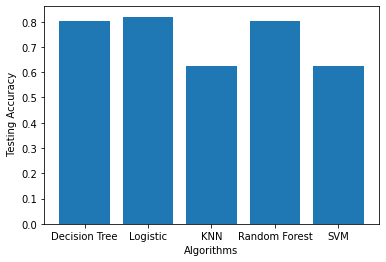

In [50]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[testing_data_accuracy_dt,testing_data_accuracy,testing_data_accuracy_knn,testing_data_accuracy_rf,testing_data_accuracy_sv])
plt.xlabel("Algorithms")
plt.ylabel(" Testing Accuracy")
plt.show()

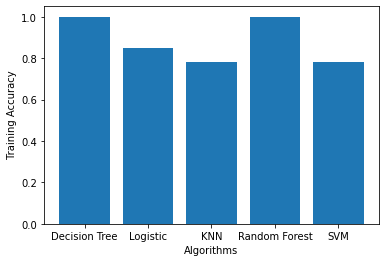

In [51]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[training_data_accuracy_dt,training_data_accuracy,training_data_accuracy_knn,training_data_accuracy_rf,training_data_accuracy_sv])
plt.xlabel("Algorithms")
plt.ylabel(" Training Accuracy")
plt.show()